/home/yuntian/anaconda3/envs/linux_QNM_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


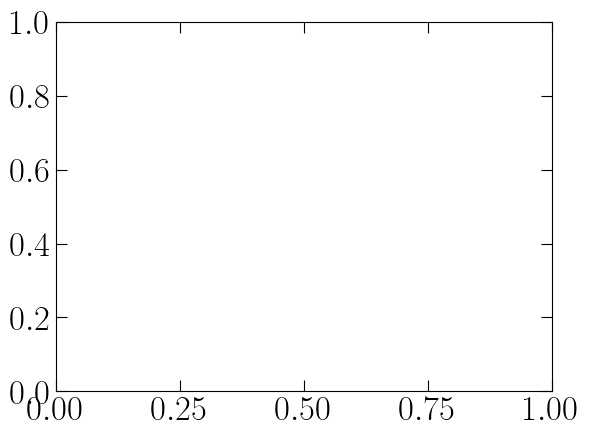

In [1]:
import numpy as np
import scipy
from scipy import stats
import qnm
from kuibit import simdir as sd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
import pickle
from adjustText import adjust_text
import seaborn as sns
from scipy.ndimage import gaussian_filter
from matplotlib.patches import Circle
from matplotlib.patches import Patch

plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["axes.labelpad"] = 8
plt.rcParams["figure.constrained_layout.h_pad"] = 0
plt.rcParams["text.usetex"] = True
plt.rcParams["font.sans-serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"
plt.tick_params(axis="both", which="minor", labelsize=18)

In [2]:
def credible_levels(H, levels=[0.68, 0.90, 0.95]):
    """给定归一化的密度数组 H，返回对应概率质量的 contour levels"""
    H_flat = H.flatten()
    idx = np.argsort(H_flat)[::-1]
    H_sorted = H_flat[idx]
    cumsum = np.cumsum(H_sorted)
    cumsum /= cumsum[-1]

    level_values = []
    for p in levels:
        i = np.searchsorted(cumsum, p)
        level_values.append(H_sorted[i])
    return level_values

def plot_corner_style_contour(samples, ax, bins=100, smooth=1.0, levels=[0.9], color='blue', fill=True,range=[[0,1],[0,1]]):
    """仿 corner 的 contour 绘图方式"""
    H, xedges, yedges = np.histogram2d(samples[:,0], samples[:,1], bins=bins, density=True,range=range)
    if smooth is not None and smooth > 0.0:
        H = gaussian_filter(H, smooth)

    H = H.T  # 因为 imshow、contour 等用的是 [y, x]
    x = 0.5 * (xedges[1:] + xedges[:-1])
    y = 0.5 * (yedges[1:] + yedges[:-1])
    X, Y = np.meshgrid(x, y)
    # X, Y = np.meshgrid(xedges, yedges)

    level_values = credible_levels(H, levels)

    if fill:
        ax.contourf(X, Y, H, levels=[level_values[0], H.max()], colors=[color], alpha=0.3)
    ax.contour(X, Y, H, levels=level_values, colors=color)

    # ax.set_aspect('equal')

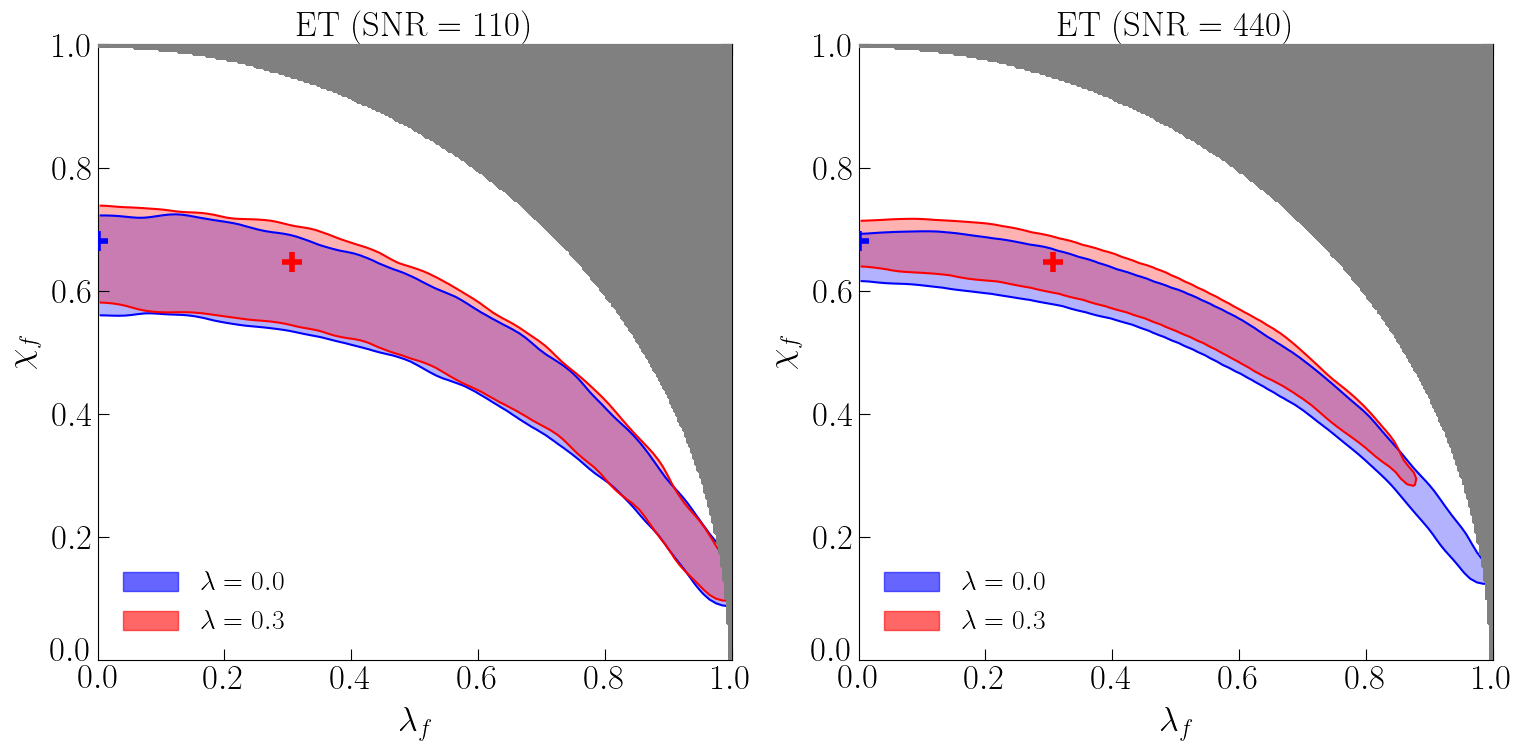

In [5]:
# 我想画大概什么样的contour图呢。。。
# 画左右两个子图，对应不同的SNR
# 每个图都画0和30的charge

fig,axs=plt.subplots(1,2,figsize=(18,8))
data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/NEW_150914_KN/KN3_0_ET_t10/KN3_0_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs[0],bins=100,smooth=2.0,levels=[0.9],color="blue",fill=True,range=[[0,1],[0,1]])

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/NEW_150914_KN/KN3_30_ET_t10/KN3_30_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs[0],bins=100,smooth=2.0,levels=[0.9],color="red",fill=True)

x = np.linspace(0, 1, 300)
y = np.linspace(0, 1, 300)
X, Y = np.meshgrid(x, y)
mask = (X**2 + Y**2 > 0.99)
axs[0].contourf(X,Y,mask,levels=[0.5,1.5],colors="gray",alpha=1,zorder=10)

axs[0].set_xlabel(r"$\lambda_f$",fontsize=25)
axs[0].set_ylabel(r"$\chi_f$",fontsize=25)
axs[0].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
axs[0].set_yticks([0.2,0.4,0.6,0.8,1.0])
axs[0].text(-0.073,0,r"$0.0$",fontsize=25)
axs[0].text(-0.03,-0.044,r"$0.0$",fontsize=25)

# axs[0].plot([0,1],[0.6803743837192758,0.6803743837192758],'--',color="blue",zorder=11)
# axs[0].plot([0.003,0.003],[0,1],'--',color="blue",zorder=11)
axs[0].scatter([0.002],[0.6803743837192758],marker='+', s=200, linewidths=4,color="blue",zorder=10)
# axs[0].plot([0,1],[0.6459900211941669,0.6459900211941669],'--',color="red",zorder=11)
# axs[0].plot([0.30708077515557636,0.30708077515557636],[0,1],'--',color="red",zorder=11)
axs[0].scatter([0.30708077515557636],[0.6459900211941669],marker='+', s=200, linewidths=4,color="red",zorder=10)

legend_elements=[Patch(facecolor="blue",edgecolor="blue",alpha=0.6,label=r"$\lambda=0.0$"),
                 Patch(facecolor="red",edgecolor="red",alpha=0.6,label=r"$\lambda=0.3$")]
axs[0].legend(handles=legend_elements,loc="lower left",fontsize=20,frameon=False)

axs[0].set_title(r"${\rm ET}\ ({\rm SNR}=110)$",fontsize=25)


data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/ET4/KN3_0_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs[1],bins=100,smooth=2.0,levels=[0.9],color="blue",fill=True)

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/ET4/KN3_30_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs[1],bins=100,smooth=2.0,levels=[0.9],color="red",fill=True)

axs[1].contourf(X,Y,mask,levels=[0.5,1.5],colors="gray",alpha=1,zorder=10)

axs[1].set_xlabel(r"$\lambda_f$",fontsize=25)
axs[1].set_ylabel(r"$\chi_f$",fontsize=25)
axs[1].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
axs[1].set_yticks([0.2,0.4,0.6,0.8,1.0])
axs[1].text(-0.073,0,r"$0.0$",fontsize=25)
axs[1].text(-0.03,-0.044,r"$0.0$",fontsize=25)

# axs[1].plot([0,1],[0.6803743837192758,0.6803743837192758],'--',color="blue",zorder=11)
# axs[1].plot([0.003,0.003],[0,1],'--',color="blue",zorder=11)
axs[1].scatter([0.002],[0.6803743837192758],marker='+', s=200, linewidths=4,color="blue",zorder=10)
# axs[1].plot([0,1],[0.6459900211941669,0.6459900211941669],'--',color="red",zorder=11)
# axs[1].plot([0.30708077515557636,0.30708077515557636],[0,1],'--',color="red",zorder=11)
axs[1].scatter([0.30708077515557636],[0.6459900211941669],marker='+', s=200, linewidths=4,color="red",zorder=10)

legend_elements=[Patch(facecolor="blue",edgecolor="blue",alpha=0.6,label=r"$\lambda=0.0$"),
                 Patch(facecolor="red",edgecolor="red",alpha=0.6,label=r"$\lambda=0.3$")]
axs[1].legend(handles=legend_elements,loc="lower left",fontsize=20,frameon=False)

axs[1].set_title(r"${\rm ET}\ ({\rm SNR}=440)$",fontsize=25)

axs[0].set_xlim([0.002,1])
axs[0].set_ylim([0,1])
axs[1].set_xlim([0.002,1])
axs[1].set_ylim([0,1])
# plt.show()
plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/chi_q_SNR.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

0.954367969457101 0.6459900211941669 0.30708077515557636


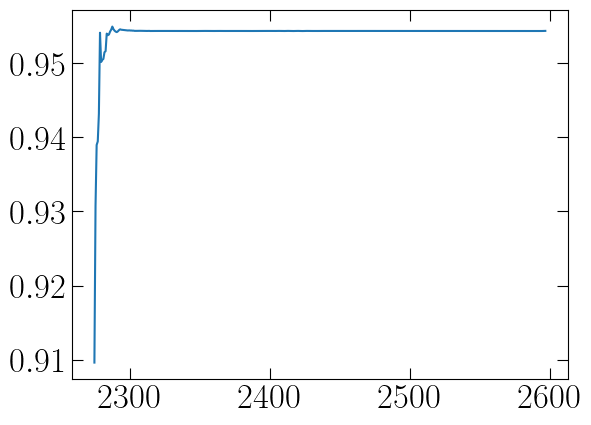

In [ ]:
# 用来看真值
# lambda   M_f    chi_f     lambda_f
# 0   0.952838602846734   0.6803743837192758   0.0
#30   0.954367969457101   0.6459900211941669   0.30708077515557636

name="30"
with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name,pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name+".pickle") as sim:
    # print(sim)
    pass

timeseries=sim.ts
mt=timeseries.scalar["qlm_mass[2]"]
st=timeseries.scalar["qlm_spin[2]"]
qt=timeseries.scalar["qlm_charge[2]"]

plt.plot(mt)
t=2400
print(mt(t),st(t)/mt(t)**2,qt(t)/mt(t))

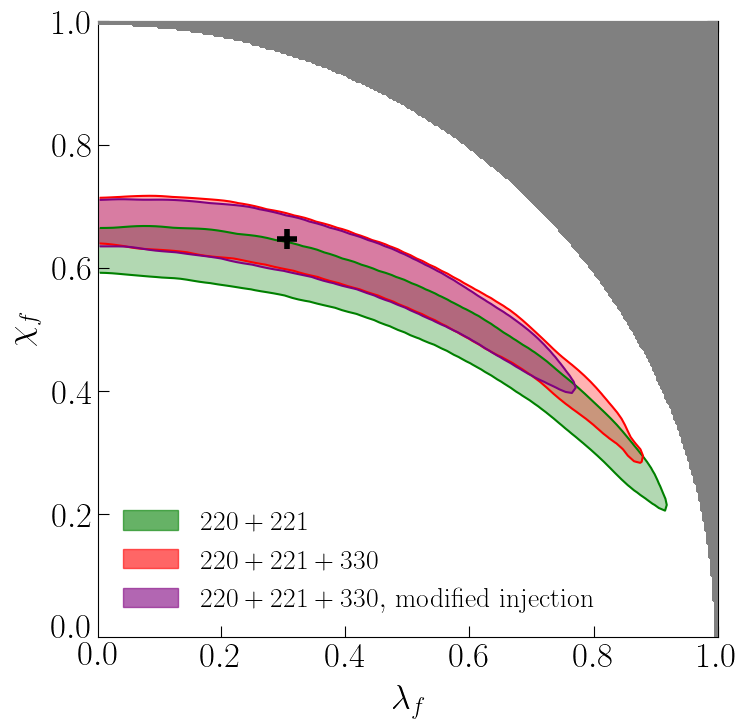

In [13]:
fig,axs=plt.subplots(1,1,figsize=(8,8))


# 我需要一个只考虑了两个mode的
# 我再需要一个人工加工增大330mode的，我们从jaxqualin里找一下对应振幅

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/ET4/KN2_30_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs,bins=100,smooth=2.0,levels=[0.9],color="green",fill=True)

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/ET4/KN3_30_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs,bins=100,smooth=2.0,levels=[0.9],color="red",fill=True)

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/ET4/KN3_30_ET_t10_330amp/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs,bins=100,smooth=2.0,levels=[0.9],color="purple",fill=True)


# axs.plot([0,1],[0.6459900211941669,0.6459900211941669],'--',color="black",zorder=11)
# axs.plot([0.30708077515557636,0.30708077515557636],[0,1],'--',color="black",zorder=11)

axs.scatter([0.30708077515557636],[0.6459900211941669],marker='+', s=200, linewidths=4,color="black",zorder=10)


x = np.linspace(0, 1, 300)
y = np.linspace(0, 1, 300)
X, Y = np.meshgrid(x, y)
mask = (X**2 + Y**2 > 0.99)
axs.contourf(X,Y,mask,levels=[0.5,1.5],colors="gray",alpha=1,zorder=10)

axs.set_xlabel(r"$\lambda_f$",fontsize=25)
axs.set_ylabel(r"$\chi_f$",fontsize=25)
axs.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
axs.set_yticks([0.2,0.4,0.6,0.8,1.0])
axs.text(-0.073,0,r"$0.0$",fontsize=25)
axs.text(-0.03,-0.044,r"$0.0$",fontsize=25)

legend_elements=[Patch(facecolor="green",edgecolor="green",alpha=0.6,label=r"$220+221$"),
                 Patch(facecolor="red",edgecolor="red",alpha=0.6,label=r"$220+221+330$"),
                 Patch(facecolor="purple",edgecolor="purple",alpha=0.6,label=r"$220+221+330,\,{\rm modified\ injection}$")]
axs.legend(handles=legend_elements,loc="lower left",fontsize=20,frameon=False)

axs.set_xlim([0.002,1])
axs.set_ylim([0,1])

plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/chi_q_330.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

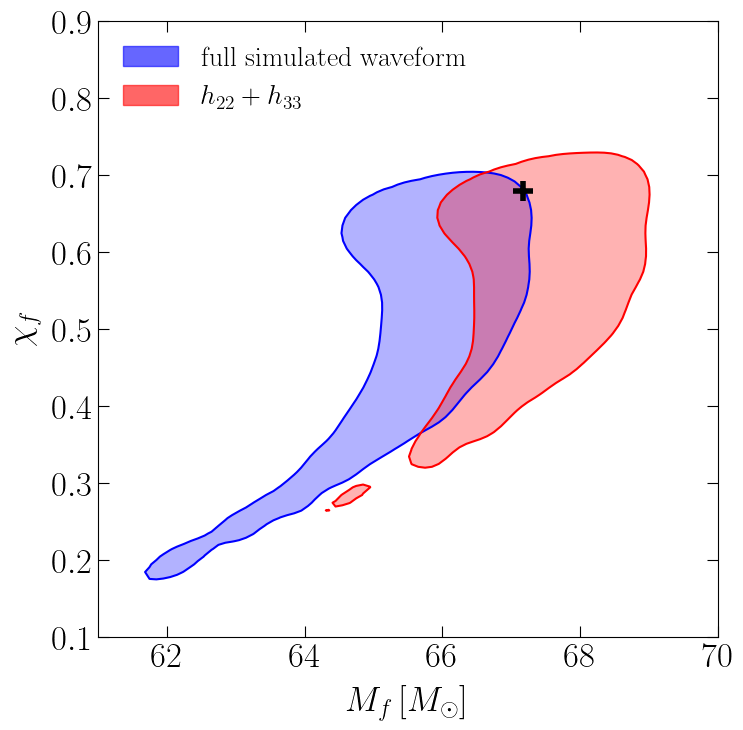

In [31]:
fig,axs=plt.subplots(1,1,figsize=(8,8))


# 我需要一个只考虑了两个mode的
# 我再需要一个人工加工增大330mode的，我们从jaxqualin里找一下对应振幅

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/ET4/KN3_0_ET_t10/Nested_sampler/posterior.dat")
af=data[:,2]
M=data[:,1]
corner_data=np.zeros([len(M),2])
corner_data[:,0]=M
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs,bins=100,smooth=2.0,levels=[0.9],color="blue",fill=True,
                          range=[[60,70],[0,1]])

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/ET4/KN3_0_ET_t10_2-2_3-3/Nested_sampler/posterior.dat")
af=data[:,2]
M=data[:,1]
corner_data=np.zeros([len(M),2])
corner_data[:,0]=M
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs,bins=100,smooth=2.0,levels=[0.9],color="red",fill=True,
                          range=[[60,70],[0,1]])

# axs.plot([60,70],[0.6803743837192758,0.6803743837192758],'--',color="red",zorder=11)
# axs.plot([0.952838602846734*70.5,0.952838602846734*70.5],[0,1],'--',color="red",zorder=11)
axs.scatter([0.952838602846734*70.5],[0.6803743837192758],marker='+', s=200, linewidths=4,color="black",zorder=10)

legend_elements=[Patch(facecolor="blue",edgecolor="blue",alpha=0.6,label=r"$\rm full\ simulated\ waveform$"),
                 Patch(facecolor="red",edgecolor="red",alpha=0.6,label=r"$h_{22}+h_{33}$")]
axs.legend(handles=legend_elements,loc="upper left",fontsize=20,frameon=False)

axs.set_ylim([0.1,0.9])
axs.set_xlim([61,70])
axs.set_xlabel(r"$M_f\,[M_\odot]$",fontsize=25)
axs.set_ylabel(r"$\chi_f$",fontsize=25)

plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/M_q.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

(0.0, 1.0)

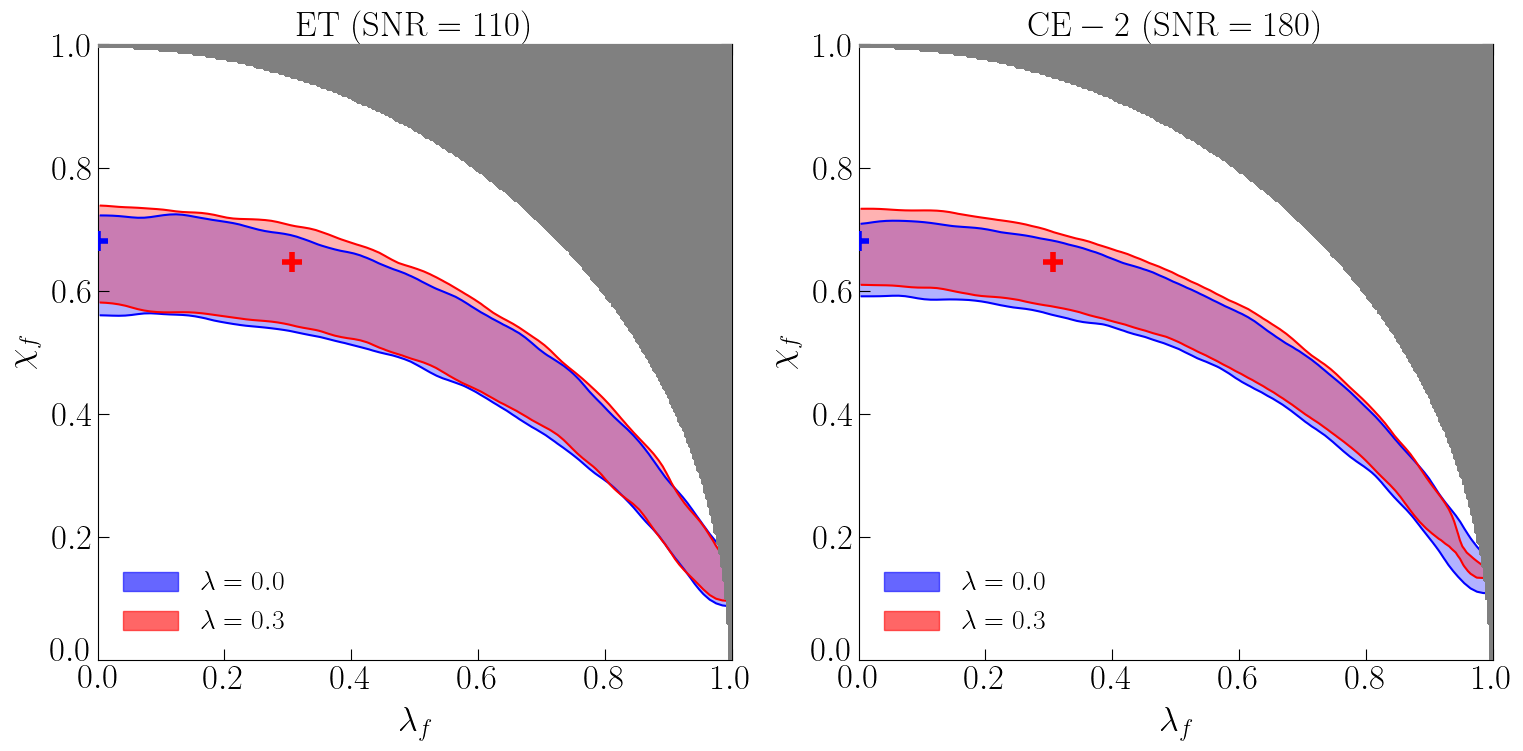

In [6]:
# 我想画大概什么样的contour图呢。。。
# 画左右两个子图，对应不同的探测器
# 每个图都画0和30的charge

fig,axs=plt.subplots(1,2,figsize=(18,8))
data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/NEW_150914_KN/KN3_0_ET_t10/KN3_0_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs[0],bins=100,smooth=2.0,levels=[0.9],color="blue",fill=True,range=[[0,1],[0,1]])

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/NEW_150914_KN/KN3_30_ET_t10/KN3_30_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs[0],bins=100,smooth=2.0,levels=[0.9],color="red",fill=True)

x = np.linspace(0, 1, 300)
y = np.linspace(0, 1, 300)
X, Y = np.meshgrid(x, y)
mask = (X**2 + Y**2 > 0.99)
axs[0].contourf(X,Y,mask,levels=[0.5,1.5],colors="gray",alpha=1,zorder=10)

axs[0].set_xlabel(r"$\lambda_f$",fontsize=25)
axs[0].set_ylabel(r"$\chi_f$",fontsize=25)
axs[0].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
axs[0].set_yticks([0.2,0.4,0.6,0.8,1.0])
axs[0].text(-0.073,0,r"$0.0$",fontsize=25)
axs[0].text(-0.03,-0.044,r"$0.0$",fontsize=25)

# axs[0].plot([0,1],[0.6803743837192758,0.6803743837192758],'--',color="blue",zorder=11)
# axs[0].plot([0.003,0.003],[0,1],'--',color="blue",zorder=11)
axs[0].scatter([0.002],[0.6803743837192758],marker='+', s=200, linewidths=4,color="blue",zorder=10)
# axs[0].plot([0,1],[0.6459900211941669,0.6459900211941669],'--',color="red",zorder=11)
# axs[0].plot([0.30708077515557636,0.30708077515557636],[0,1],'--',color="red",zorder=11)
axs[0].scatter([0.30708077515557636],[0.6459900211941669],marker='+', s=200, linewidths=4,color="red",zorder=10)

legend_elements=[Patch(facecolor="blue",edgecolor="blue",alpha=0.6,label=r"$\lambda=0.0$"),
                 Patch(facecolor="red",edgecolor="red",alpha=0.6,label=r"$\lambda=0.3$")]
axs[0].legend(handles=legend_elements,loc="lower left",fontsize=20,frameon=False)

axs[0].set_title(r"${\rm ET}\ ({\rm SNR}=110)$",fontsize=25)


data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/CE-2/KN3_0_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs[1],bins=100,smooth=2.0,levels=[0.9],color="blue",fill=True)

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/CE-2/KN3_30_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs[1],bins=100,smooth=2.0,levels=[0.9],color="red",fill=True)

axs[1].contourf(X,Y,mask,levels=[0.5,1.5],colors="gray",alpha=1,zorder=10)

axs[1].set_xlabel(r"$\lambda_f$",fontsize=25)
axs[1].set_ylabel(r"$\chi_f$",fontsize=25)
axs[1].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
axs[1].set_yticks([0.2,0.4,0.6,0.8,1.0])
axs[1].text(-0.073,0,r"$0.0$",fontsize=25)
axs[1].text(-0.03,-0.044,r"$0.0$",fontsize=25)

# axs[1].plot([0,1],[0.6803743837192758,0.6803743837192758],'--',color="blue",zorder=11)
# axs[1].plot([0.003,0.003],[0,1],'--',color="blue",zorder=11)
axs[1].scatter([0.002],[0.6803743837192758],marker='+', s=200, linewidths=4,color="blue",zorder=10)
# axs[1].plot([0,1],[0.6459900211941669,0.6459900211941669],'--',color="red",zorder=11)
# axs[1].plot([0.30708077515557636,0.30708077515557636],[0,1],'--',color="red",zorder=11)
axs[1].scatter([0.30708077515557636],[0.6459900211941669],marker='+', s=200, linewidths=4,color="red",zorder=10)

legend_elements=[Patch(facecolor="blue",edgecolor="blue",alpha=0.6,label=r"$\lambda=0.0$"),
                 Patch(facecolor="red",edgecolor="red",alpha=0.6,label=r"$\lambda=0.3$")]
axs[1].legend(handles=legend_elements,loc="lower left",fontsize=20,frameon=False)

axs[1].set_title(r"${\rm CE-2}\ ({\rm SNR}=180)$",fontsize=25)

axs[0].set_xlim([0.002,1])
axs[0].set_ylim([0,1])
axs[1].set_xlim([0.002,1])
axs[1].set_ylim([0,1])
# plt.show()
# plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/chi_q_SNR.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

Text(0, 0.5, '$S_n\\,[{\\rm s}]$')

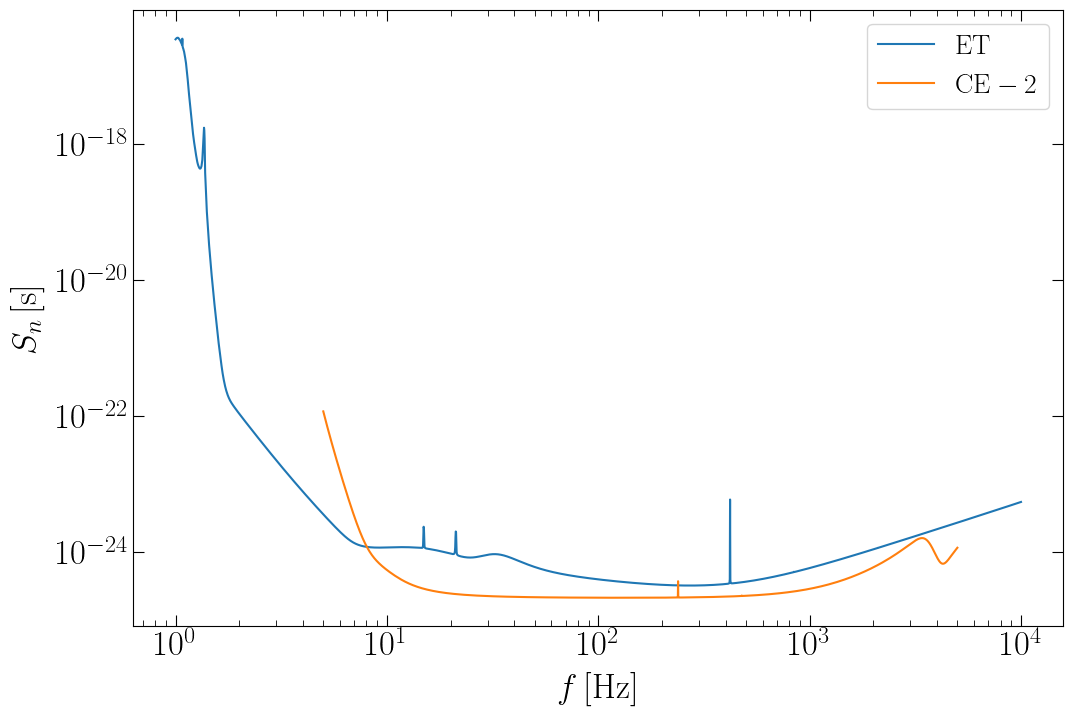

In [15]:
plt.figure(figsize=(12,8))

data=np.genfromtxt("ASD_ET.txt")
plt.plot(data[:,0],data[:,1],label=r"${\rm ET}$")

data=np.genfromtxt("ASD_ce2.txt")
plt.plot(data[:,0],data[:,1],label=r"${\rm CE-2}$")

plt.legend(fontsize=20)
plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"$f\,[{\rm Hz}]$",fontsize=25)
plt.ylabel(r"$S_n\,[{\rm s}]$",fontsize=25)

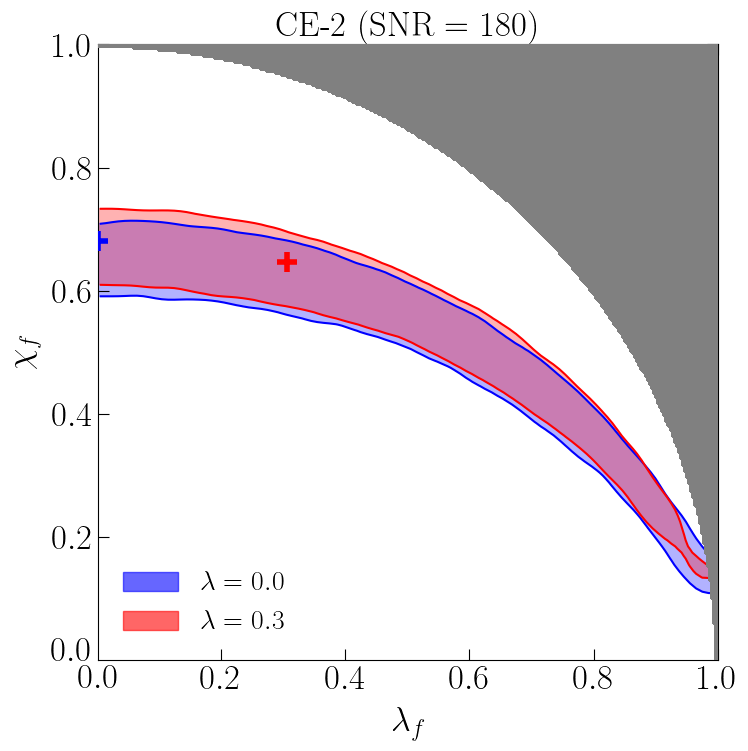

In [11]:
fig,axs=plt.subplots(1,1,figsize=(8,8))


# 我需要一个只考虑了两个mode的
# 我再需要一个人工加工增大330mode的，我们从jaxqualin里找一下对应振幅

# data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/ET4/KN2_30_ET_t10/Nested_sampler/posterior.dat")
# Q=data[:,4]
# af=data[:,2]
# corner_data=np.zeros([len(Q),2])
# corner_data[:,0]=Q
# corner_data[:,1]=af
# plot_corner_style_contour(samples=corner_data,ax=axs,bins=100,smooth=2.0,levels=[0.9],color="green",fill=True)

# data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/ET4/KN3_30_ET_t10/Nested_sampler/posterior.dat")
# Q=data[:,4]
# af=data[:,2]
# corner_data=np.zeros([len(Q),2])
# corner_data[:,0]=Q
# corner_data[:,1]=af
# plot_corner_style_contour(samples=corner_data,ax=axs,bins=100,smooth=2.0,levels=[0.9],color="red",fill=True)

# data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/ET4/KN3_30_ET_t10_330amp/Nested_sampler/posterior.dat")
# Q=data[:,4]
# af=data[:,2]
# corner_data=np.zeros([len(Q),2])
# corner_data[:,0]=Q
# corner_data[:,1]=af
# plot_corner_style_contour(samples=corner_data,ax=axs,bins=100,smooth=2.0,levels=[0.9],color="purple",fill=True)

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/CE-2/KN3_0_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs,bins=100,smooth=2.0,levels=[0.9],color="blue",fill=True)

data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/CE-2/KN3_30_ET_t10/Nested_sampler/posterior.dat")
Q=data[:,4]
af=data[:,2]
corner_data=np.zeros([len(Q),2])
corner_data[:,0]=Q
corner_data[:,1]=af
plot_corner_style_contour(samples=corner_data,ax=axs,bins=100,smooth=2.0,levels=[0.9],color="red",fill=True)

# axs.plot([0,1],[0.6459900211941669,0.6459900211941669],'--',color="black",zorder=11)
# axs.plot([0.30708077515557636,0.30708077515557636],[0,1],'--',color="black",zorder=11)

axs.scatter([0.002],[0.6803743837192758],marker='+', s=200, linewidths=4,color="blue",zorder=10)
axs.scatter([0.30708077515557636],[0.6459900211941669],marker='+', s=200, linewidths=4,color="red",zorder=10)


x = np.linspace(0, 1, 300)
y = np.linspace(0, 1, 300)
X, Y = np.meshgrid(x, y)
mask = (X**2 + Y**2 > 0.99)
axs.contourf(X,Y,mask,levels=[0.5,1.5],colors="gray",alpha=1,zorder=10)

axs.set_xlabel(r"$\lambda_f$",fontsize=25)
axs.set_ylabel(r"$\chi_f$",fontsize=25)
axs.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
axs.set_yticks([0.2,0.4,0.6,0.8,1.0])
axs.text(-0.073,0,r"$0.0$",fontsize=25)
axs.text(-0.03,-0.044,r"$0.0$",fontsize=25)

legend_elements=[Patch(facecolor="blue",edgecolor="blue",alpha=0.6,label=r"$\lambda=0.0$"),
                 Patch(facecolor="red",edgecolor="red",alpha=0.6,label=r"$\lambda=0.3$")]
axs.legend(handles=legend_elements,loc="lower left",fontsize=20,frameon=False)

axs.set_title(r"${\rm CE\mbox{-}2}\ ({\rm SNR}=180)$",fontsize=25)

# legend_elements=[Patch(facecolor="green",edgecolor="green",alpha=0.6,label=r"$220+221$"),
#                  Patch(facecolor="red",edgecolor="red",alpha=0.6,label=r"$220+221+330$"),
#                  Patch(facecolor="purple",edgecolor="purple",alpha=0.6,label=r"$220+221+330\,,{\rm modified\ injection}$")]
# axs.legend(handles=legend_elements,loc="lower left",fontsize=20,frameon=False)

axs.set_xlim([0.002,1])
axs.set_ylim([0,1])

plt.savefig("/mnt/c/Users/91228/Documents/VScode_code/KerrNewmanFigure/chi_q_330_CE.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)